In [ ]:
!pip install pytorch-tabnet

In [ ]:
import pandas as pd
import numpy as np
import sklearn
from sklearn import metrics

from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

from pytorch_tabnet.tab_model import TabNetClassifier

import torch

import scipy
from scipy import stats

In [ ]:
#Считывание датасета
dataset_train_path = "/content/drive/My Drive/data_matrix_extended_true_train"
raw_dataset_train = pd.read_csv(dataset_train_path, sep=" ",
                                error_bad_lines=False)
dataset_test_path = "/content/drive/My Drive/data_matrix_extended_true_test"
raw_dataset_test = pd.read_csv(dataset_test_path, sep=" ",
                               error_bad_lines=False)
train_dataset = raw_dataset_train.copy()
test_dataset = raw_dataset_test.copy()

In [ ]:
val_dataset = train_dataset.sample(frac = 0.3, random_state = 1)
train_dataset = train_dataset.drop(val_dataset.index)

train_labels = train_dataset.pop('Cell_1424_lg')
test_labels = test_dataset.pop('Cell_1424_lg')
val_labels = val_dataset.pop('Cell_1424_lg')

In [ ]:
#Разобьём на классы
train_labels.loc[train_labels == 0] = 0
train_labels.loc[train_labels > 0] = 1
print(train_labels.head())

test_labels.loc[test_labels == 0] = 0
test_labels.loc[test_labels > 0] = 1
print(test_labels.head())

val_labels.loc[val_labels == 0] = 0
val_labels.loc[val_labels > 0] = 1
print(val_labels.head())

0    0.0
2    0.0
3    0.0
5    0.0
7    0.0
Name: Cell_1424_lg, dtype: float64
0    1.0
1    1.0
2    0.0
3    0.0
4    1.0
Name: Cell_1424_lg, dtype: float64
136680    0.0
20760     0.0
158436    0.0
57264     0.0
759       0.0
Name: Cell_1424_lg, dtype: float64


In [ ]:
train_dataset = np.array(train_dataset)
test_dataset = np.array(test_dataset)
val_dataset = np.array(val_dataset)

In [ ]:
#Вводим tabnet модель
model = TabNetClassifier()

Device used : cuda


In [ ]:
model.fit(train_dataset, train_labels,
          eval_set=[(train_dataset, train_labels),
                    (val_dataset, val_labels)],
                    eval_metric = ['auc'])

epoch 0  | loss: 0.49365 | val_0_auc: 0.81977 | val_1_auc: 0.81515 |  0:00:15s
epoch 1  | loss: 0.43868 | val_0_auc: 0.82381 | val_1_auc: 0.82149 |  0:00:30s
epoch 2  | loss: 0.4199  | val_0_auc: 0.83134 | val_1_auc: 0.82723 |  0:00:45s
epoch 3  | loss: 0.41122 | val_0_auc: 0.8378  | val_1_auc: 0.83289 |  0:01:00s
epoch 4  | loss: 0.39931 | val_0_auc: 0.85861 | val_1_auc: 0.85233 |  0:01:15s
epoch 5  | loss: 0.38454 | val_0_auc: 0.87106 | val_1_auc: 0.86416 |  0:01:30s
epoch 6  | loss: 0.37471 | val_0_auc: 0.87948 | val_1_auc: 0.87203 |  0:01:45s
epoch 7  | loss: 0.36809 | val_0_auc: 0.88204 | val_1_auc: 0.87373 |  0:02:00s
epoch 8  | loss: 0.36301 | val_0_auc: 0.88721 | val_1_auc: 0.87746 |  0:02:15s
epoch 9  | loss: 0.35803 | val_0_auc: 0.89039 | val_1_auc: 0.87869 |  0:02:30s
epoch 10 | loss: 0.35479 | val_0_auc: 0.89281 | val_1_auc: 0.87996 |  0:02:45s
epoch 11 | loss: 0.35127 | val_0_auc: 0.89512 | val_1_auc: 0.88118 |  0:03:00s
epoch 12 | loss: 0.34678 | val_0_auc: 0.89829 | val_

In [ ]:
y_pred = model.predict_proba(test_dataset)[:, 1]

In [ ]:
fpr_tabnet, tpr_tabnet, thresholds_tabnet = roc_curve(test_labels, y_pred)
auc_tabnet = auc(fpr_tabnet, tpr_tabnet)

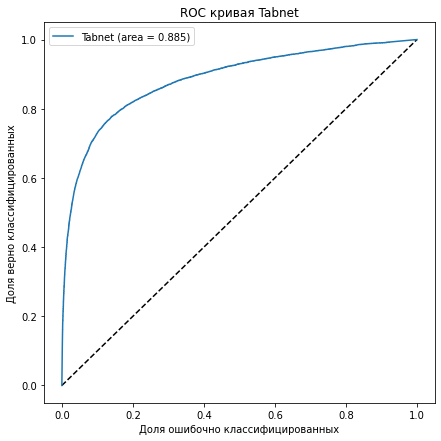

In [ ]:
plt.figure(figsize=(7, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_tabnet, tpr_tabnet,
         label='Tabnet (area = {:.3f})'.format(auc_tabnet))
plt.xlabel('Доля ошибочно классифицированных')
plt.ylabel('Доля верно классифицированных')
plt.title('ROC кривая Tabnet')
plt.legend(loc='best')
plt.savefig('/content/drive/My Drive/ExpressionClassifier_Tabnet.png')
plt.show()

In [ ]:
Pearson = stats.pearsonr(y_pred, test_labels)
Pearson

(0.6846029516129267, 0.0)